<a href="https://colab.research.google.com/github/iyed-26/XO-game-project-/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_path = pd.read_csv('/content/predictive_maintenance.csv')

In [3]:
df = data_path.copy()

In [4]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
df['Tool wear [min]']=df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]']=df['Rotational speed [rpm]'].astype('float64')

In [6]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [7]:
df.rename(mapper={'Air temperature [K] ': 'Air temperature', 'Process temperature [K]': 'Process temperature',
                 'Rotational speed [rpm]':'Rotational speed','Torque [Nm]':'Torque','Tool wear [min]':'Tool wear'

} , axis =1 , inplace= True)

In [8]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,5,L47184,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604.0,29.5,14.0,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632.0,31.8,17.0,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645.0,33.4,22.0,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408.0,48.5,25.0,0,No Failure


In [9]:
df['Product ID'] = df['Product ID'].apply(lambda x: x[1:])

In [10]:
df['Product ID']=pd.to_numeric(df['Product ID'])

In [11]:
df


,UDI,Product ID,Type,Air temperature [K],Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,2,47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,3,47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,4,47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,5,47184,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,24855,M,298.8,308.4,1604.0,29.5,14.0,0,No Failure
9996,9997,39410,H,298.9,308.4,1632.0,31.8,17.0,0,No Failure
9997,9998,24857,M,299.0,308.6,1645.0,33.4,22.0,0,No Failure
9998,9999,39412,H,299.0,308.7,1408.0,48.5,25.0,0,No Failure


In [12]:
df.drop(columns=['UDI'],inplace=True)



In [13]:
df


,Product ID,Type,Air temperature [K],Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,47184,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,24855,M,298.8,308.4,1604.0,29.5,14.0,0,No Failure
9996,39410,H,298.9,308.4,1632.0,31.8,17.0,0,No Failure
9997,24857,M,299.0,308.6,1645.0,33.4,22.0,0,No Failure
9998,39412,H,299.0,308.7,1408.0,48.5,25.0,0,No Failure


In [14]:
features = ['Type',	'Air temperature [K]'	,'Process temperature',	'Rotational speed'	,'Torque',	'Tool wear'	]

In [15]:
target=['Target'	,'Failure Type']

In [16]:
supr1=df.loc[df['Failure Type']=='Random Failures'].index

In [17]:
df.loc[supr1,target]

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [18]:
df.drop(supr1,inplace=True)

In [19]:
df


,Product ID,Type,Air temperature [K],Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,47184,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,24855,M,298.8,308.4,1604.0,29.5,14.0,0,No Failure
9996,39410,H,298.9,308.4,1632.0,31.8,17.0,0,No Failure
9997,24857,M,299.0,308.6,1645.0,33.4,22.0,0,No Failure
9998,39412,H,299.0,308.7,1408.0,48.5,25.0,0,No Failure


In [20]:
df.shape

(9982, 9)

In [21]:
supr2=df.loc[(df['Failure Type']=='No Failure') & (df['Target']==1)].index

In [22]:
df.loc[supr2,target]

,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [23]:
df.drop(supr2 , inplace=True)

In [24]:
df

,Product ID,Type,Air temperature [K],Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,47184,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,24855,M,298.8,308.4,1604.0,29.5,14.0,0,No Failure
9996,39410,H,298.9,308.4,1632.0,31.8,17.0,0,No Failure
9997,24857,M,299.0,308.6,1645.0,33.4,22.0,0,No Failure
9998,39412,H,299.0,308.7,1408.0,48.5,25.0,0,No Failure


In [25]:
df.drop('Product ID',axis=1,inplace=True)

In [26]:
list(df['Failure Type'].values)

['No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'Power Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Failure',
 'No Fa

In [27]:
df

,Type,Air temperature [K],Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604.0,29.5,14.0,0,No Failure
9996,H,298.9,308.4,1632.0,31.8,17.0,0,No Failure
9997,M,299.0,308.6,1645.0,33.4,22.0,0,No Failure
9998,H,299.0,308.7,1408.0,48.5,25.0,0,No Failure


In [28]:
chang1={'L':1 ,'M':2 ,'H':3}
chang2={'No Failure':0 ,'Power Failure':1 ,'Heat Dissipation Failure':2,'Tool Wear Failure':3,'Overstrain Failure':4}
df['Type'].replace(to_replace=chang1 ,inplace=True)
df['Failure Type'].replace(to_replace=chang2 ,inplace=True)


<ipython-input-28-b4958583382b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].replace(to_replace=chang1 ,inplace=True)
<ipython-input-28-b4958583382b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type'].replace(to_replace=chang1 ,inplace=True)
<ipython-input-28-b4958583382b>:4:

In [29]:
df

,Type,Air temperature [K],Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,2,298.1,308.6,1551.0,42.8,0.0,0,0
1,1,298.2,308.7,1408.0,46.3,3.0,0,0
2,1,298.1,308.5,1498.0,49.4,5.0,0,0
3,1,298.2,308.6,1433.0,39.5,7.0,0,0
4,1,298.2,308.7,1408.0,40.0,9.0,0,0
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604.0,29.5,14.0,0,0
9996,3,298.9,308.4,1632.0,31.8,17.0,0,0
9997,2,299.0,308.6,1645.0,33.4,22.0,0,0
9998,3,299.0,308.7,1408.0,48.5,25.0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()

In [31]:
num_features = [feature for feature in features if df[feature].dtype=='float64']

In [32]:
df[num_features] = sc.fit_transform(df[num_features])

In [33]:
pca = PCA(n_components=len(num_features))
X_pca = pd.DataFrame(data=pca.fit_transform(df[num_features]), columns=['PC'+str(i+1) for i in range(len(num_features))])
var_exp = pd.Series(data=100*pca.explained_variance_ratio_, index=['PC'+str(i+1) for i in range(len(num_features))])
print('Explained variance ratio per component:', round(var_exp,2), sep='\n')
print('Explained variance ratio with 3 components: '+str(round(var_exp.values[:3].sum(),2)))


Explained variance ratio per component:
PC1    38.25
PC2    36.78
PC3    19.99
PC4     2.53
PC5     2.45
dtype: float64
Explained variance ratio with 3 components: 95.02


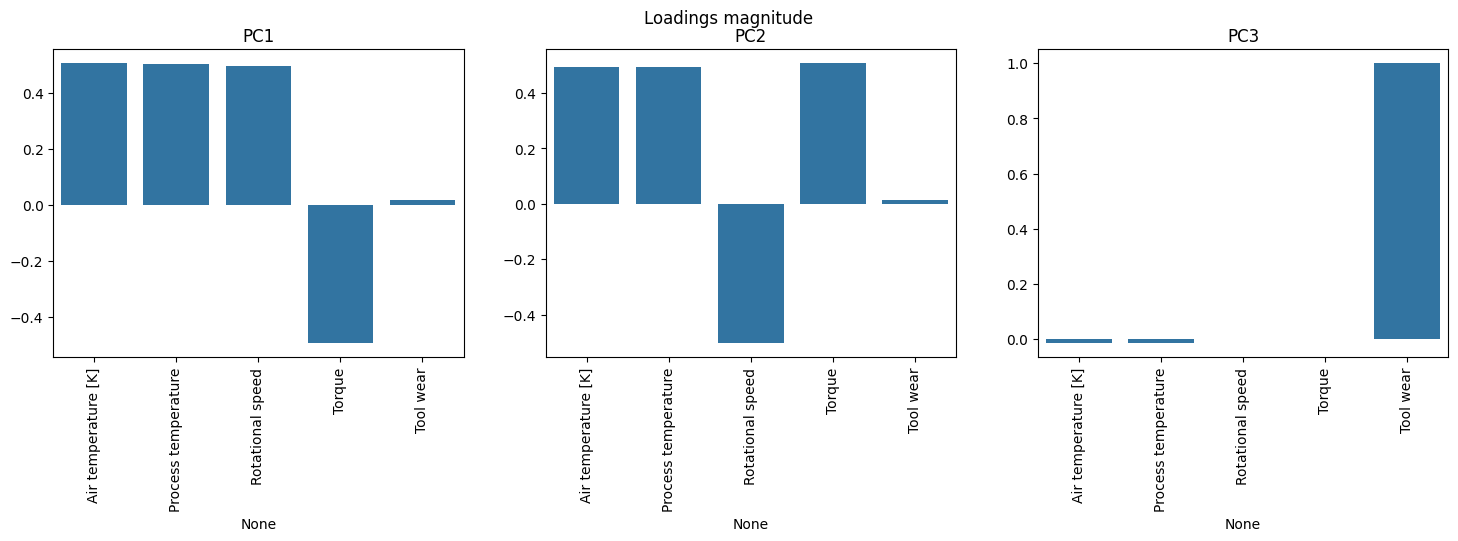

In [34]:
# PCA for Data visualization
pca3 = PCA(n_components=3)
X_pca3 = pd.DataFrame(data=pca3.fit_transform(df[num_features]), columns=['PC1','PC2','PC3'])

# Loadings Analysis
fig, axs = plt.subplots(ncols=3, figsize=(18,4))
fig.suptitle('Loadings magnitude')
pca_loadings = pd.DataFrame(data=pca3.components_, columns=num_features)
for j in range(3):
    ax = axs[j]
    sns.barplot(ax=ax, x=pca_loadings.columns, y=pca_loadings.values[j])
    ax.tick_params(axis='x', rotation=90)
    ax.title.set_text('PC'+str(j+1))
plt.show()

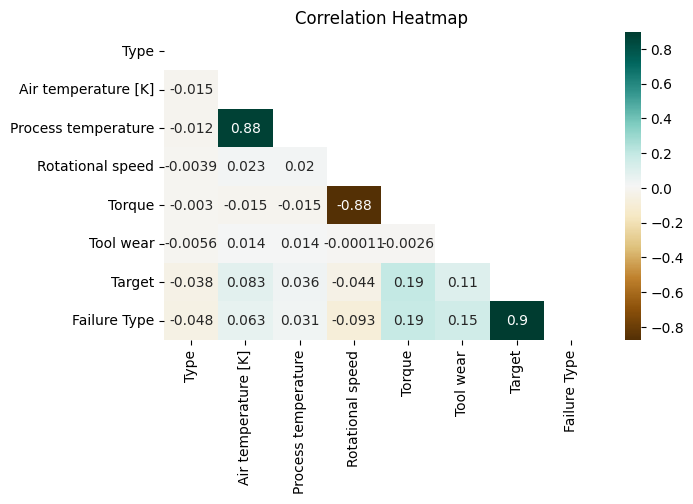

In [35]:
plt.figure(figsize=(7,4))
sns.heatmap(data=df.corr(), mask=np.triu(df.corr()), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression

In [37]:
x , y =df[features] , df[['Target','Failure Type']]
x_trainval , x_test ,y_trainval , y_test = train_test_split(x,y,test_size=0.1,stratify=df['Failure Type'],random_state=0)
x_train , x_val ,y_train , y_val = train_test_split(x_trainval,y_trainval,test_size=0.11,stratify=y_trainval['Failure Type'],random_state=0)


In [38]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train , y_train['Target'])
y_val_lr = lr.predict(x_val)
y_test_lr = lr.predict(x_test)

In [39]:
def eval_preds(model,X,y_true,y_pred):

        y_true = y_true['Target']
        cm = confusion_matrix(y_true, y_pred)
        proba = model.predict_proba(X)[:,1]
        acc = accuracy_score(y_true, y_pred)
        auc = roc_auc_score(y_true, proba)
        f1 = f1_score(y_true, y_pred, pos_label=1)
        f2 = fbeta_score(y_true, y_pred, pos_label=1, beta=2)
        metrics = pd.Series(data={'ACC':acc, 'AUC':auc, 'F1':f1, 'F2':f2})
        metrics = round(metrics,3)
        return cm, metrics

In [40]:
cm_val_lr, metrics_val_lr = eval_preds(lr,x_val,y_val,y_val_lr)
cm_test_lr, metrics_test_lr = eval_preds(lr,x_test,y_test,y_test_lr)
print('Validation set metrics:',metrics_val_lr, sep='\n')
print('Test set metrics:',metrics_test_lr, sep='\n')

Validation set metrics:
ACC    0.968
AUC    0.925
F1     0.158
F2     0.109
dtype: float64
Test set metrics:
ACC    0.973
AUC    0.928
F1     0.341
F2     0.250
dtype: float64


In [41]:
x , y =df[features] , df[['Target','Failure Type']]
xx_trainval , xx_test ,yy_trainval , yy_test = train_test_split(x,y,test_size=0.1,stratify=df['Failure Type'],random_state=0)
xx_train , xx_val ,yy_train , yy_val = train_test_split(xx_trainval,yy_trainval,test_size=0.11,stratify=y_trainval['Failure Type'],random_state=0)


In [42]:
from sklearn.ensemble import RandomForestClassifier
xg=RandomForestClassifier(random_state=0)
xg.fit(xx_train , yy_train['Target'])
yy_val_xg = xg.predict(xx_val)
yy_test_xg = xg.predict(xx_test)

In [43]:
cm_val_xg, metrics_val_xg = eval_preds(xg,xx_val,yy_val,yy_val_xg)
cm_test_xg, metrics_test_xg = eval_preds(xg,xx_test,yy_test,yy_test_xg)
print('Validation set metrics:',metrics_val_xg, sep='\n')
print('Test set metrics:',metrics_test_xg, sep='\n')

Validation set metrics:
ACC    0.983
AUC    0.989
F1     0.702
F2     0.641
dtype: float64
Test set metrics:
ACC    0.983
AUC    0.958
F1     0.679
F2     0.592
dtype: float64
